In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fit

In [ ]:
dG=pd.read_csv('WUG.csv')
display(dG)

dG=dG.dropna()

,Year,Tmax,Tavg,Tmin,DPMax,DPAvg,DPMin,HumMax,HumAvg,HumMin,WSPMax,WSPAvg,WSPMin,PMax,PAvg,PMin,Precip,Riverton WY
0,1976,37.206897,27.913793,11.344828,24.000000,16.568966,3.310345,84.482759,60.924138,27.448276,12.758621,5.158621,0.413793,24.486207,24.175862,20.996552,0.000000,0
1,1980,33.448276,24.917241,14.586207,24.206897,16.768966,7.241379,86.689655,72.268966,50.827586,5.379310,1.182759,0.000000,24.520690,24.320690,22.706897,0.000000,0
2,1984,30.137931,20.096552,6.655172,22.068966,13.734483,2.758621,90.068966,71.200000,34.310345,9.241379,2.500000,0.000000,24.517241,24.248276,21.024138,0.000000,0
3,1988,39.931034,29.675862,16.275862,20.931034,14.037931,4.379310,78.241379,51.141379,21.655172,13.310345,4.558621,0.000000,24.575862,24.386207,23.613793,0.000000,0
4,1992,43.310345,33.548276,20.931034,29.655172,20.003448,1.000000,83.620690,56.448276,6.413793,9.000000,3.544828,0.172414,24.568966,24.396552,22.779310,0.000000,0
5,1996,36.655172,24.072414,8.655172,16.655172,9.431034,0.655172,73.448276,50.565517,17.103448,16.896552,8.358621,1.241379,24.617241,24.517241,24.375862,0.000000,0
6,2000,35.594828,25.216872,15.951970,20.023399,14.518966,8.416256,84.873153,63.348768,35.110837,16.639163,7.519951,0.865764,24.650616,24.539901,24.438424,0.000000,0
7,2004,31.275862,22.910345,13.965517,20.758621,15.275862,8.448276,90.827586,74.417241,55.448276,13.620690,6.513793,0.620690,24.617241,24.517241,24.431034,0.000000,0
8,2008,36.310345,25.955172,16.586207,20.827586,14.868966,9.413793,81.827586,59.558621,36.137931,17.689655,7.844828,0.310345,24.534483,24.344828,23.475862,0.000000,0
9,2012,36.103448,25.651724,15.241379,18.482759,13.172414,6.724138,81.310345,62.089655,39.206897,17.103448,8.062069,0.620690,24.606897,24.500000,24.400000,0.000000,0


In [ ]:
stx=dG["Tmax"]
stn=dG["Tmin"]
sdt=dG["Year"]-1960
#calculating a true average using T old avg and T new avg:
dG['Toavg']=(dG['Tavg'])
dG['Tnavg']=(dG["Tmax"]+dG["Tmin"])/2
dG["Tavg"]=(dG['Toavg']+dG['Tnavg'])/2
sav=dG["Toavg"]
display(dG)



,Year,Tmax,Tavg,Tmin,DPMax,DPAvg,DPMin,HumMax,HumAvg,HumMin,WSPMax,WSPAvg,WSPMin,PMax,PAvg,PMin,Precip,Riverton WY,Toavg,Tnavg
0,1976,37.206897,26.094828,11.344828,24.000000,16.568966,3.310345,84.482759,60.924138,27.448276,12.758621,5.158621,0.413793,24.486207,24.175862,20.996552,0.000000,0,27.913793,24.275862
1,1980,33.448276,24.467241,14.586207,24.206897,16.768966,7.241379,86.689655,72.268966,50.827586,5.379310,1.182759,0.000000,24.520690,24.320690,22.706897,0.000000,0,24.917241,24.017241
2,1984,30.137931,19.246552,6.655172,22.068966,13.734483,2.758621,90.068966,71.200000,34.310345,9.241379,2.500000,0.000000,24.517241,24.248276,21.024138,0.000000,0,20.096552,18.396552
3,1988,39.931034,28.889655,16.275862,20.931034,14.037931,4.379310,78.241379,51.141379,21.655172,13.310345,4.558621,0.000000,24.575862,24.386207,23.613793,0.000000,0,29.675862,28.103448
4,1992,43.310345,32.834483,20.931034,29.655172,20.003448,1.000000,83.620690,56.448276,6.413793,9.000000,3.544828,0.172414,24.568966,24.396552,22.779310,0.000000,0,33.548276,32.120690
5,1996,36.655172,23.363793,8.655172,16.655172,9.431034,0.655172,73.448276,50.565517,17.103448,16.896552,8.358621,1.241379,24.617241,24.517241,24.375862,0.000000,0,24.072414,22.655172
6,2000,35.594828,25.495135,15.951970,20.023399,14.518966,8.416256,84.873153,63.348768,35.110837,16.639163,7.519951,0.865764,24.650616,24.539901,24.438424,0.000000,0,25.216872,25.773399
7,2004,31.275862,22.765517,13.965517,20.758621,15.275862,8.448276,90.827586,74.417241,55.448276,13.620690,6.513793,0.620690,24.617241,24.517241,24.431034,0.000000,0,22.910345,22.620690
8,2008,36.310345,26.201724,16.586207,20.827586,14.868966,9.413793,81.827586,59.558621,36.137931,17.689655,7.844828,0.310345,24.534483,24.344828,23.475862,0.000000,0,25.955172,26.448276
9,2012,36.103448,25.662069,15.241379,18.482759,13.172414,6.724138,81.310345,62.089655,39.206897,17.103448,8.062069,0.620690,24.606897,24.500000,24.400000,0.000000,0,25.651724,25.672414


In [ ]:
def f(m,x,b):
  return (m*x)+b
p=[1,1]

In [ ]:
para,cv=fit.curve_fit(f,sdt,stx,p)
max=f(para[0],sdt,para[1])
pm=para[0]
bm=para[1]
print(max)
para,cv=fit.curve_fit(f,sdt,stn,p)
pn=para[0]
bn=para[1]
min=f(para[0],sdt,para[1])
print(min)
para, cv = fit.curve_fit(f, sdt, sav, p)  # sdt as x, sav as y
pa=para[0]
ba=para[1]
avg=f(para[0],sdt,para[1])
print(avg)
nam=dG.columns[17]
nam

0     36.673266
1     36.505021
2     36.336775
3     36.168530
4     36.000284
5     35.832039
6     35.663793
7     35.495548
8     35.327302
9     35.159056
10    34.990811
11    34.822565
12    34.654320
Name: Year, dtype: float64
0     12.646173
1     12.911425
2     13.176677
3     13.441929
4     13.707181
5     13.972433
6     14.237685
7     14.502937
8     14.768189
9     15.033441
10    15.298693
11    15.563945
12    15.829197
Name: Year, dtype: float64
0     26.779017
1     26.609123
2     26.439229
3     26.269335
4     26.099441
5     25.929547
6     25.759653
7     25.589759
8     25.419865
9     25.249972
10    25.080078
11    24.910184
12    24.740290
Name: Year, dtype: float64


'Riverton WY'

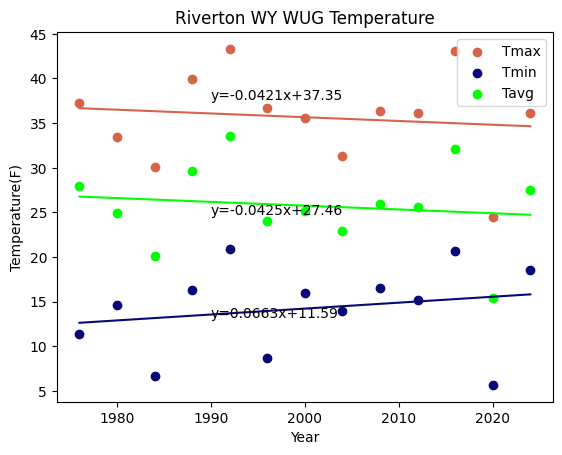

In [ ]:
date=dG["Year"]
TMax=stx
TMin=stn
Tavg=sav
mx=np.mean(TMax)+2
mn=np.mean(TMin)-1
ma=np.mean(Tavg)-1
plt.scatter(date,TMax,label="Tmax",color="#d6644b")
plt.scatter(date,TMin,label="Tmin",color="#080878")
plt.scatter(date,Tavg,label="Tavg",color="lime")
plt.plot(date,max,color="#d6644b")
plt.plot(date,min,color="#080878")
plt.plot(date,avg,color="lime")
plt.text(1990, mx, 'y='+ '{:.4f}'.format(pm) +"x"+'{:+.2f}'.format(bm), size=10)
plt.text(1990, ma, 'y='+ '{:.4f}'.format(pa) +"x"+'{:+.2f}'.format(ba), size=10)
plt.text(1990, mn, 'y='+ '{:.4f}'.format(pn) +"x"+'{:+.2f}'.format(bn), size=10)
plt.title(nam + " WUG Temperature")
plt.xlabel("Year")
plt.ylabel("Temperature(F)")
plt.legend()
plt.show()


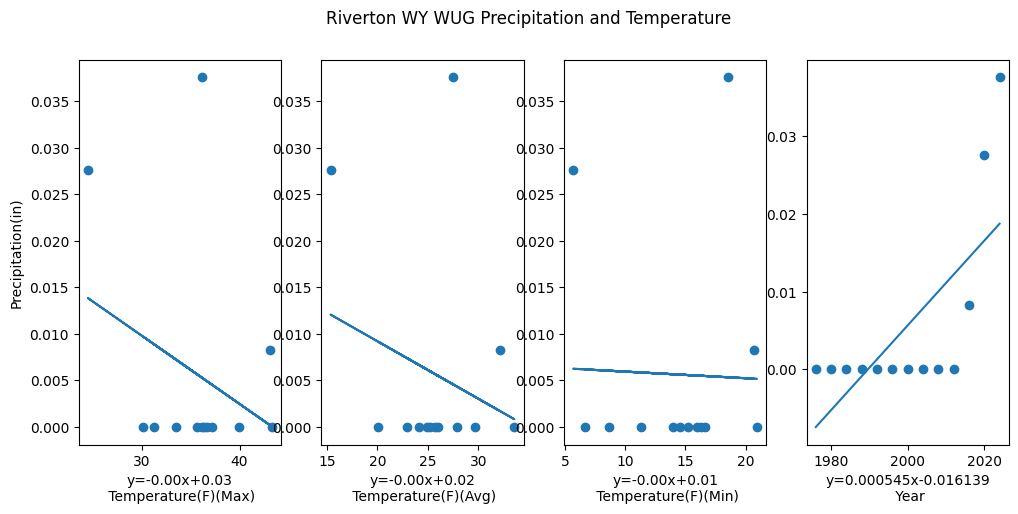

In [ ]:
fig,ax=plt.subplots(1,4,figsize=(12,5))

fig.suptitle(nam + " WUG Precipitation and Temperature")
#Max temp
ax[0].scatter(TMax,dG['Precip'])
para,cv=fit.curve_fit(f,TMax,dG['Precip'],p)
prec=f(para[0],TMax,para[1])
ax[0].plot(TMax,prec)
ax[0].set_ylabel("Precipitation(in)")
ax[0].set_xlabel('y='+ '{:.2f}'.format(para[0]) +'x'+'{:+.2f}'.format(para[1]) +"\n Temperature(F)(Max)")
#Average Temp
ax[1].scatter(Tavg,dG['Precip'])
para,cv=fit.curve_fit(f,Tavg,dG['Precip'],p)
prec=f(para[0],Tavg,para[1])
ax[1].plot(Tavg,prec)
ax[1].set_xlabel('y='+ '{:.2f}'.format(para[0]) +"x"+'{:+.2f}'.format(para[1]) +"\n Temperature(F)(Avg)")
#Low Temp
ax[2].scatter(TMin,dG['Precip'])
para,cv=fit.curve_fit(f,TMin,dG['Precip'],p)
prec=f(para[0],TMin,para[1])
ax[2].plot(TMin,prec)
ax[2].set_xlabel('y='+ '{:.2f}'.format(para[0]) +"x"+'{:+.2f}'.format(para[1]) +"\n Temperature(F)(Min)")
#Precip to date
ax[3].scatter(date,dG['Precip'])
para,cv=fit.curve_fit(f,sdt,dG['Precip'],p)
prec=f(para[0],sdt,para[1])
ax[3].plot(date,prec)
ax[3].set_xlabel('y='+ '{:.6f}'.format(para[0]) +"x"+'{:+.6f}'.format(para[1])+"\n Year")
plt.show()